In [187]:
#Autor: Marta Kiszka
#Projekt z przedmiotu Zastosowanie metod uczenia maszynowego



```
TODO LIST:
 1. Opis problemu
 2. Opis zestawu danych
 3. Import bibliotek w pierwszej komórce kodowej
 4. Charakterystyki jakościowe zestawu danych
 5. Przekształcenia danych
 6. Analiza eksploracyjna
 7. Podział na próbki treningową i testową
 8. Budowa modelu - min. 2 modeli wykorzystując różne algorytmy i/lub hiperparametry
 9. Ocena jakości modeli, porównanie.
```



**`1. Opis problemu`**

In [188]:
#Analizie będą podlegać różne parametry czerwonych win i ich wpływ na ostateczną jakość trunków

**` 2. Opis zestawu danych`**

In [189]:
#W pliku źródłowym dostępnym na platformie Teams mamy dostępne następujące dane:

#fixed acidity - Kwasowość stała: To ilość kwasów niezmiennych w winie, głównie kwasów winowych i cytrynowych. Wpływa na kwasowość i świeżość wina.
#volatile acidity	- Kwasowość lotna: To ilość kwasów, które mogą ulatniać się jako gazy. Zbyt wysoka kwasowość lotna może nadać winu nieprzyjemny smak octu.
#citric acid - Kwas cytrynowy: To rodzaj kwasu obecny w owocach cytrusowych. Może dodać świeżości i owocowych nut do wina.
#residual sugar	- Cukier resztkowy: To ilość pozostałego cukru w winie po procesie fermentacji. Wpływa na słodycz wina. Wina słodkie mają więcej cukru resztkowego.
#chlorides - Chlorki: To ilość chlorków w winie, które mogą pochodzić z wody użytej w produkcji. Wysokie stężenie chlorków może wpływać na smak wina.
#free sulfur dioxide - Wolny dwutlenek siarki: To ilość dwutlenku siarki w formie gazowej, który działa jako konserwant w winie i chroni je przed utlenianiem się i zepsuciem.
#total sulfur dioxide	- Całkowity dwutlenek siarki: To suma wolnego i związanej siarki w winie. Kontroluje ona trwałość wina i może wpłynąć na jego jakość.
#density - Gęstość: To masa wina w jednostce objętości. Może dostarczać informacji na temat zawartości alkoholu i cukru w winie.
#pH	- Potencjał hydrogenny: Określa kwasowość lub zasadowość wina. Wartość pH wpływa na strukturę i równowagę smaku wina.
#sulphates - Siarczany: To ilość siarczanów w winie. Siarczany działają jako konserwant i przeciwdziałają rozwojowi niepożądanych mikroorganizmów.
#alcohol - Alkohol: To zawartość alkoholu w winie, wyrażona w procentach objętościowych. Ma duży wpływ na aromat, smak i ogólną jakość wina.
#quality - Jakość: To subiektywna ocena jakości wina, która może być przypisana na podstawie testów sensorycznych i ekspertyz wina. Wartość ta może służyć do klasyfikacji wina.

**` 3. Import bibliotek w pierwszej komórce kodowej`**

In [190]:
#Manipulacja i analiza danych (wczytywanie CSV do DataFrame)
#pkt 4, 5, 6
import pandas as pd

#Wykresy i wizualizacje danych
#pkt 6
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Tablice i obliczenia numeryczne
#całość
import numpy as np

#Analiza danych i uczenie maszynowe
#pkt 7
from sklearn.model_selection import train_test_split
#Model regresji liniowej
#pkt 8
from sklearn.linear_model import LinearRegression
#Model regresji drzewa decyzyjnego
#pkt 8
from sklearn.tree import DecisionTreeRegressor

#Mean Squared Error - MSE i R-squared - R2 lub R-squared score
#pkt 8
from sklearn.metrics import mean_squared_error, r2_score

**` 4. Charakterystyki jakościowe zestawu danych`**

In [191]:
#ładownie danych
redwines = pd.read_csv('redwines.csv')

In [192]:
#podstawowe informacje o danych
redwines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.90,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
2,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5
3,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5
4,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7


In [193]:
#ramka
rw = redwines.copy()

In [194]:
#informacje o kolumnach
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [195]:
#statystyki opisowe
rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


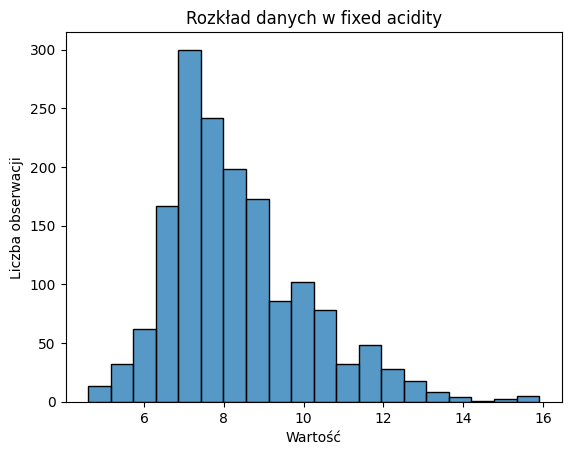

In [197]:
#ROZKŁADY
sns.histplot(rw['fixed acidity'], bins=20)
plt.title('Rozkład danych w fixed acidity')
plt.xlabel('Wartość')
plt.ylabel('Liczba obserwacji')
plt.show()

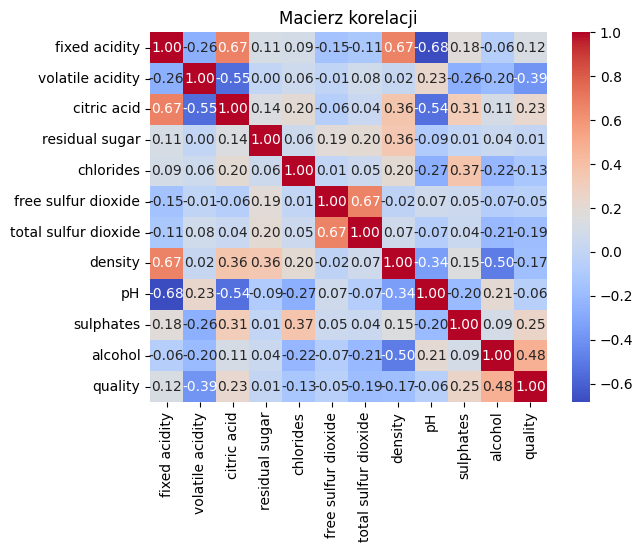

In [199]:
#korelacje
correlation_matrix = rw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

**` 5. Przekształcenia danych`**

In [200]:
#Sprawdzenie NULL
rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

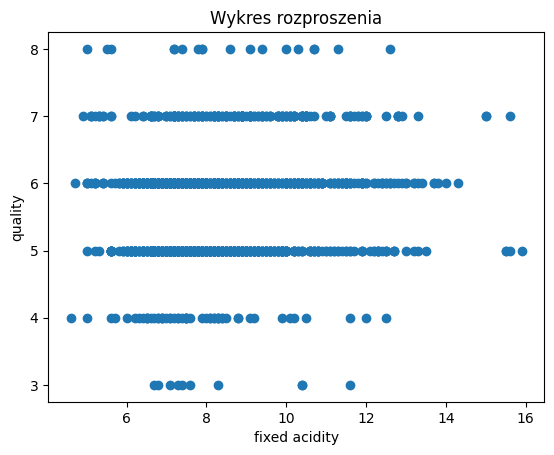

In [201]:
#Wartości odstraszające

#dla fixed acidity
plt.scatter(rw['fixed acidity'], rw['quality'])
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

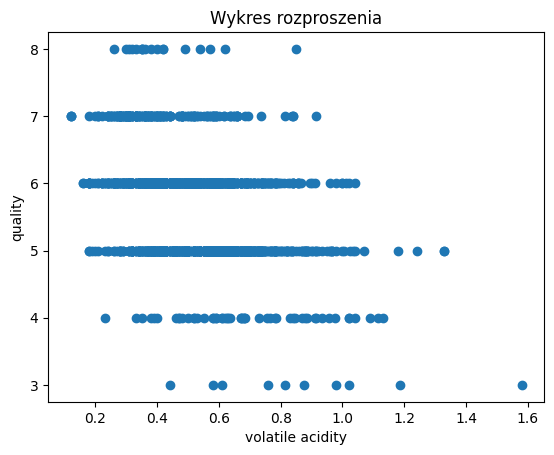

In [202]:
#dla volatile acidity
plt.scatter(rw['volatile acidity'], rw['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

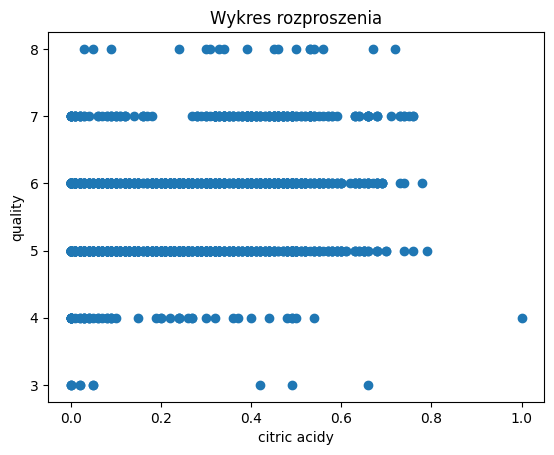

In [203]:
#dla citric acid
plt.scatter(rw['citric acid'], rw['quality'])
plt.xlabel('citric acidy')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

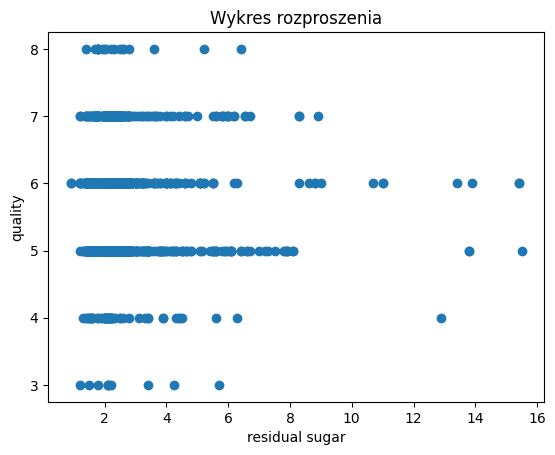

In [204]:
#dla residual sugar
plt.scatter(rw['residual sugar'], rw['quality'])
plt.xlabel('residual sugar')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

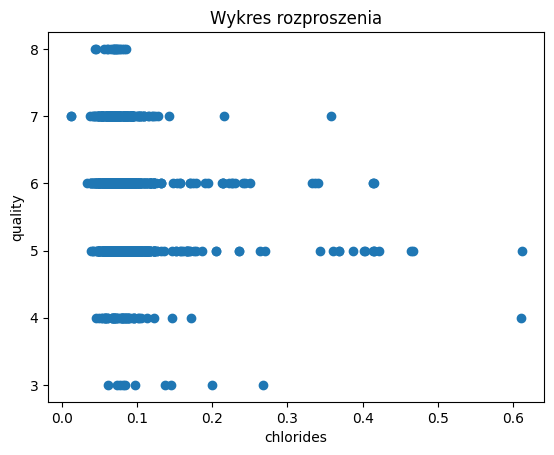

In [205]:
#dla chlorides
plt.scatter(rw['chlorides'], rw['quality'])
plt.xlabel('chlorides')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

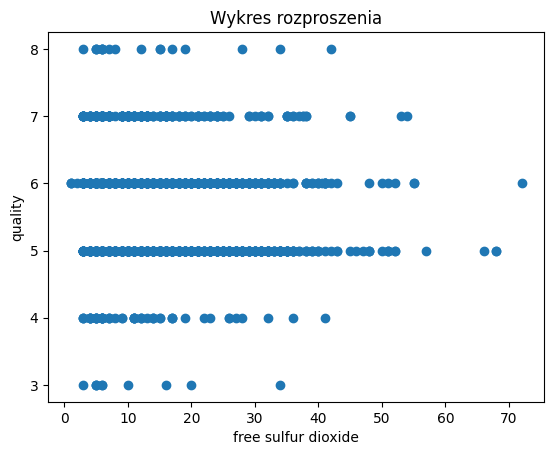

In [206]:
#dla free sulfur dioxide
plt.scatter(rw['free sulfur dioxide'], rw['quality'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

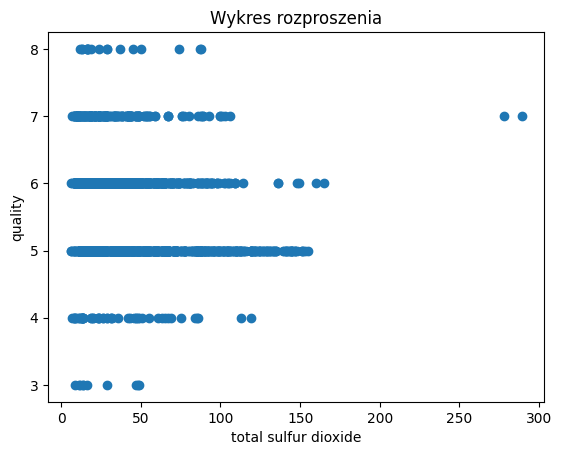

In [207]:
#dla total sulfur dioxide
plt.scatter(rw['total sulfur dioxide'], rw['quality'])
plt.xlabel('total sulfur dioxide')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

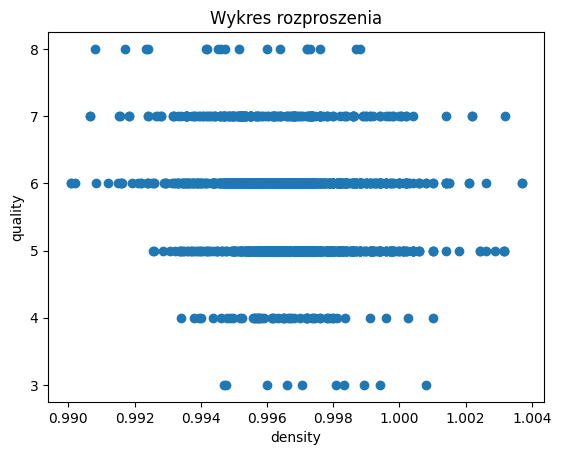

In [208]:
#dla density
plt.scatter(rw['density'], rw['quality'])
plt.xlabel('density')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

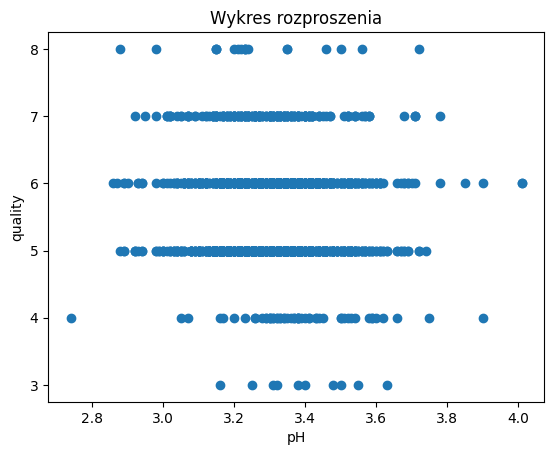

In [209]:
#dla pH
plt.scatter(rw['pH'], rw['quality'])
plt.xlabel('pH')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

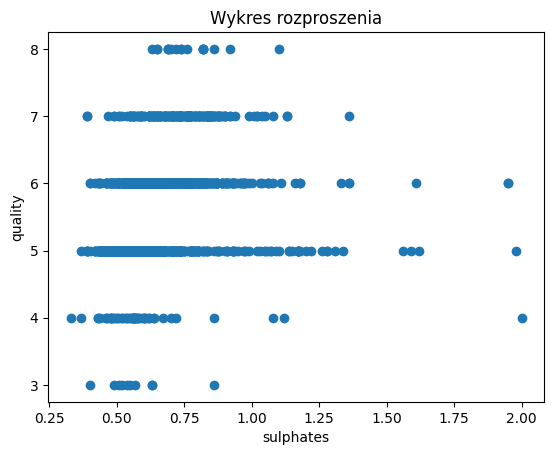

In [210]:
#dla sulphates
plt.scatter(rw['sulphates'], rw['quality'])
plt.xlabel('sulphates')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

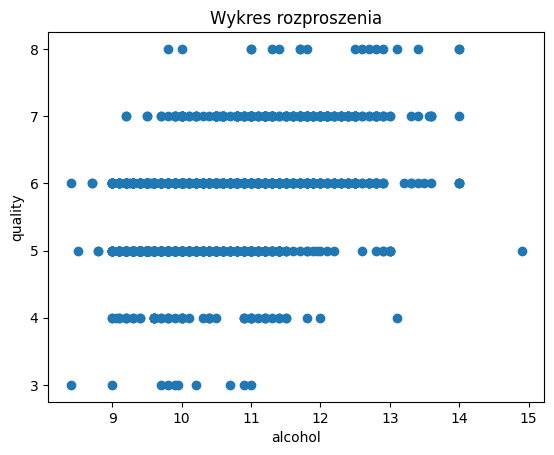

In [211]:
#dla alcohol
plt.scatter(rw['alcohol'], rw['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('Wykres rozproszenia')
plt.show()

In [212]:
#Po krótkim przeglądzie danych w PowerBi zauważyłam, że zdarzają się duplikaty w zbiorze
#Sprawdzenie duplikatów
rw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595     True
1596    False
1597    False
1598    False
Length: 1599, dtype: bool

In [213]:
#Suma duplikatów
rw.duplicated().sum()

240

In [214]:
#Usunięcie duplikatów
rw.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
2,6.9,0.520,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5
3,7.3,0.590,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5
4,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.6,0.815,0.02,2.7,0.072,17.0,34.0,0.99550,3.58,0.89,12.3,7
1594,6.5,0.400,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6
1596,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,7
1597,6.6,0.440,0.15,2.1,0.076,22.0,53.0,0.99570,3.32,0.62,9.3,5


In [215]:
#Nowa ramka bez duplikatów
rw_1 = rw.drop_duplicates()

In [216]:
#Wydruk
print("DataFrame po usunięciu duplikatów:")
print(rw_1)

DataFrame po usunięciu duplikatów:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.5             0.900         0.00             1.6      0.052   
1               9.1             0.220         0.24             2.1      0.078   
2               6.9             0.520         0.25             2.6      0.081   
3               7.3             0.590         0.26             2.0      0.080   
4              12.5             0.280         0.54             2.3      0.082   
...             ...               ...          ...             ...        ...   
1592            6.6             0.815         0.02             2.7      0.072   
1594            6.5             0.400         0.10             2.0      0.076   
1596           10.2             0.340         0.48             2.1      0.052   
1597            6.6             0.440         0.15             2.1      0.076   
1598            8.2             0.915         0.27             2.1      0.

In [217]:
#Sprawdzenie ponownie sumy duplikatów
#Suma duplikatów
rw_1.duplicated().sum()

0

In [218]:
#Usuwanie zbędnej kolumny

#Ponieważ w macierzy korelacji widzimy, że kolumna "fixed acidity" jest silnie skorelowana z kolumnami (powyżej 0.65 wartości bezwzględnej):
#"citric acid"
#"density"
#"pH"
#
#Widzimy również, że kolumny "free sulfur dioxide" i "total sulfur dioxide" również silnie są ze sobą skorelowane (0.65 wartości bezwzględnej).
#Usunę "total sulfur dioxide" ponieważ na wykresie rozproszenia (wartości odstraszające) wartości total sulfur dioxide/quality są dużo bardziej "zbite" niż w kolumnie "free sulfur dioxide".
#
#Aby ograniczyć ilość danych, usuwam kolumny "fixed acidity" i "total sulfur dioxide" ze zbioru

rw_2 = rw_1.drop(['fixed acidity','total sulfur dioxide'],axis=1)
print(rw_2)

      volatile acidity  citric acid  residual sugar  chlorides  \
0                0.900         0.00             1.6      0.052   
1                0.220         0.24             2.1      0.078   
2                0.520         0.25             2.6      0.081   
3                0.590         0.26             2.0      0.080   
4                0.280         0.54             2.3      0.082   
...                ...          ...             ...        ...   
1592             0.815         0.02             2.7      0.072   
1594             0.400         0.10             2.0      0.076   
1596             0.340         0.48             2.1      0.052   
1597             0.440         0.15             2.1      0.076   
1598             0.915         0.27             2.1      0.088   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  
0                     9.0  0.99467  3.50       0.63     10.9        6  
1                     1.0  0.99900  3.41       0.87     10.3   

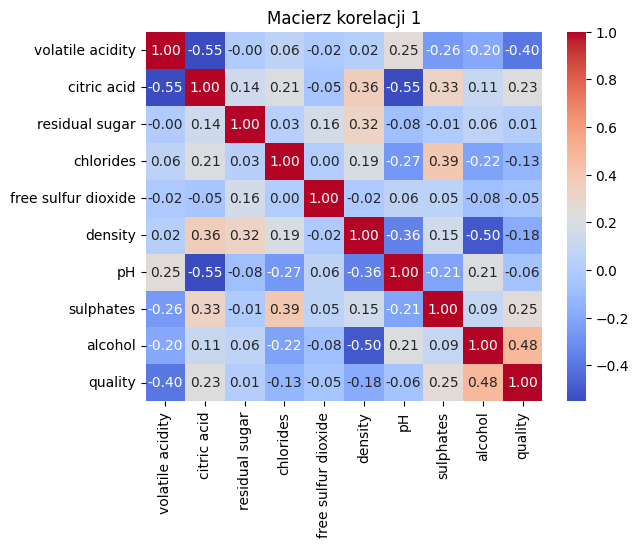

In [219]:
#Ponowne wyświetlenie macierzy korelacji
correlation_matrix_1 = rw_2.corr()
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji 1')
plt.show()

In [220]:
#Przekształcenie danych pod regresję liniową
#Normalizacja (skalowanie Min-Max)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rw_3 = pd.DataFrame(scaler.fit_transform(rw_2), columns=rw_2.columns)
print(rw_3)

      volatile acidity  citric acid  residual sugar  chlorides  \
0             0.534247         0.00        0.047945   0.066778   
1             0.068493         0.24        0.082192   0.110184   
2             0.273973         0.25        0.116438   0.115192   
3             0.321918         0.26        0.075342   0.113523   
4             0.109589         0.54        0.095890   0.116861   
...                ...          ...             ...        ...   
1354          0.476027         0.02        0.123288   0.100167   
1355          0.191781         0.10        0.075342   0.106845   
1356          0.150685         0.48        0.082192   0.066778   
1357          0.219178         0.15        0.082192   0.106845   
1358          0.544521         0.27        0.082192   0.126878   

      free sulfur dioxide   density        pH  sulphates   alcohol  quality  
0                0.112676  0.337739  0.598425   0.179641  0.384615      0.6  
1                0.000000  0.655653  0.527559   0.3

In [221]:
#Przekształcenie danych pod drzewo decyzyjne
#Dyskretyzacja zmiennych ciągłych

#Będziemy robić koszyki ze względu na kolumnę "alcohol" ponieważ jest ona na ten moment najsilniej skorelowana ze zmienną celu quantity (0.48)

# Wartość minimalna w kolumnie "alcohol"
min_value_alcohol = rw_3['alcohol'].min()
print(f"Wartość minimalna w kolumnie {'alcohol'}: {min_value_alcohol}")

#Wartość maksymalna w kolumnie "alcohol"
max_value_alcohol = rw_3['alcohol'].max()
print(f"Wartość maksymalna w kolumnie {'alcohol'}: {max_value_alcohol}")

Wartość minimalna w kolumnie alcohol: 0.0
Wartość maksymalna w kolumnie alcohol: 1.0000000000000002


In [222]:
#Pojawia się błąd zaokrąglenia -  błąd reprezentacji liczb zmiennoprzecinkowych
print(rw_3[rw_3['alcohol'] == 1.0000000000000002])

     volatile acidity  citric acid  residual sugar  chlorides  \
901          0.164384         0.65        0.452055   0.140234   

     free sulfur dioxide   density        pH  sulphates  alcohol  quality  
901             0.295775  0.552863  0.188976   0.305389      1.0      0.4  


In [224]:
#Jednak na wydruku mamy kolumnę "alcohol" o wartości 1.0

In [225]:
#Zrobimy 5 koszyków
#Określenie przedziałów
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

#Edit: Określenie labelek.
#Edit: Moglibyśmy je wrzucić bezpośrednio do funkcji cut ale przyda nam się przy późniejszym błędzie
labels = ['under_or_equal_0.2', 'under_or_equal_0.4', 'under_or_equal_0.6','under_or_equal_0.8','under_or_equal_1.0']

# Używanie funkcji cut do dokonania dyskretyzacji
rw_3['alcohol_bins'] = pd.cut(rw_3['alcohol'], bins=bins, labels=labels)

# Wyświetlenie wynikowego DataFrame
print(rw_3)


      volatile acidity  citric acid  residual sugar  chlorides  \
0             0.534247         0.00        0.047945   0.066778   
1             0.068493         0.24        0.082192   0.110184   
2             0.273973         0.25        0.116438   0.115192   
3             0.321918         0.26        0.075342   0.113523   
4             0.109589         0.54        0.095890   0.116861   
...                ...          ...             ...        ...   
1354          0.476027         0.02        0.123288   0.100167   
1355          0.191781         0.10        0.075342   0.106845   
1356          0.150685         0.48        0.082192   0.066778   
1357          0.219178         0.15        0.082192   0.106845   
1358          0.544521         0.27        0.082192   0.126878   

      free sulfur dioxide   density        pH  sulphates   alcohol  quality  \
0                0.112676  0.337739  0.598425   0.179641  0.384615      0.6   
1                0.000000  0.655653  0.527559   0

In [226]:
#Sprawdzenie jak została zakwalifikowany wiersz z błędem reprezentacji liczb binarnych
print(rw_3[rw_3['alcohol'] == 1.0000000000000002])

     volatile acidity  citric acid  residual sugar  chlorides  \
901          0.164384         0.65        0.452055   0.140234   

     free sulfur dioxide   density        pH  sulphates  alcohol  quality  \
901             0.295775  0.552863  0.188976   0.305389      1.0      0.4   

    alcohol_bins  
901          NaN  


In [227]:
#Niestety tak jak myślałam mamy błąd, sprawdźmy czy jeszcze gdzieś nie dostaliśmy jakiś dziwnych wartości
#Sprawdzimy gdzie alcohol_bins nie  równają się zaproponowanym wcześniej labekom
print(rw_3[~rw_3['alcohol_bins'].isin(labels)])

     volatile acidity  citric acid  residual sugar  chlorides  \
474          0.130137         0.74        0.061644   0.105175   
683          0.335616         0.49        0.082192   0.313856   
901          0.164384         0.65        0.452055   0.140234   

     free sulfur dioxide   density        pH  sulphates  alcohol  quality  \
474             0.070423  0.787812  0.094488   0.275449      0.0      0.6   
683             0.056338  0.685022  0.330709   0.179641      0.0      0.0   
901             0.295775  0.552863  0.188976   0.305389      1.0      0.4   

    alcohol_bins  
474          NaN  
683          NaN  
901          NaN  


In [228]:
#Błędów jest na tyle mało, że poprawimy je ręcznie

# Zmiana wartości w komórce 474
rw_3.at[474, 'alcohol_bins'] = 'under_or_equal_0.2'

# Zmiana wartości w komórce 683
rw_3.at[683, 'alcohol_bins'] = 'under_or_equal_0.2'

# Zmiana wartości w komórce 474
rw_3.at[901, 'alcohol_bins'] = 'under_or_equal_1.0'

In [229]:
#Sprawdzimy dla pewności gdzie alcohol_bins nie równają się zaproponowanym wcześniej labekom
print(rw_3[~rw_3['alcohol_bins'].isin(labels)])

Empty DataFrame
Columns: [volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol, quality, alcohol_bins]
Index: []


In [230]:
#Jeszcze dla pewności jak się wyświetla ostatnia kategoria
print(rw_3[rw_3['alcohol_bins'] == "under_or_equal_1.0"])

      volatile acidity  citric acid  residual sugar  chlorides  \
91            0.232877         0.45        0.116438   0.088481   
168           0.205479         0.00        0.082192   0.060100   
315           0.150685         0.00        0.061644   0.063439   
573           0.205479         0.24        0.075342   0.080134   
787           0.178082         0.01        0.047945   0.060100   
901           0.164384         0.65        0.452055   0.140234   
1301          0.253425         0.03        0.061644   0.053422   

      free sulfur dioxide   density        pH  sulphates   alcohol  quality  \
91               0.084507  0.339941  0.456693   0.275449  0.861538      0.6   
168              0.211268  0.107930  0.763780   0.245509  0.861538      0.8   
315              0.366197  0.112335  0.740157   0.275449  0.861538      0.6   
573              0.253521  0.119677  0.771654   0.245509  0.861538      1.0   
787              0.352113  0.056535  0.755906   0.251497  0.861538      0.6 

In [231]:
#Udało się ręcznie poprawić błędy,
#Dane są przygotowane:
#pod regresję liniową - normalizacja (skalowanie Min-Max)
#pod drzewo decyzyjne - zdyskretyzowane zmienne ciągłe ze względu na kolumnę "alcohol"

**`6. Analiza eksploracyjna`**

In [232]:
#Podstawowe statystyki
summary_stats = rw_3.describe()
print(summary_stats)

print(rw_3)

       volatile acidity  citric acid  residual sugar    chlorides  \
count       1359.000000  1359.000000     1359.000000  1359.000000   
mean           0.280464     0.272333        0.111192     0.127085   
std            0.125364     0.195537        0.092624     0.082432   
min            0.000000     0.000000        0.000000     0.000000   
25%            0.184932     0.090000        0.068493     0.096828   
50%            0.273973     0.260000        0.089041     0.111853   
75%            0.356164     0.430000        0.116438     0.131886   
max            1.000000     1.000000        1.000000     1.000000   

       free sulfur dioxide      density           pH    sulphates  \
count          1359.000000  1359.000000  1359.000000  1359.000000   
mean              0.209765     0.487441     0.448651     0.196829   
std               0.147145     0.137219     0.122076     0.102196   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.084507     0.

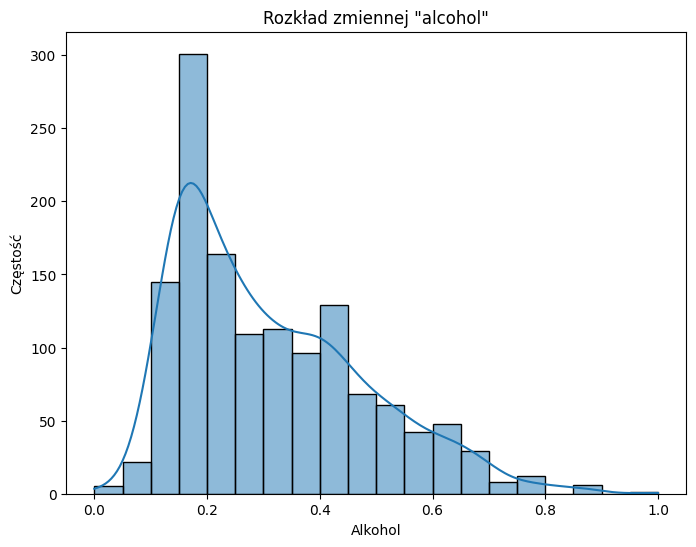

In [233]:
#Wykres histogramu zmiennej "alcohol"
plt.figure(figsize=(8, 6))
sns.histplot(rw_3['alcohol'], bins=20, kde=True)
plt.title('Rozkład zmiennej "alcohol"')
plt.xlabel('Alkohol')
plt.ylabel('Częstość')
plt.show()

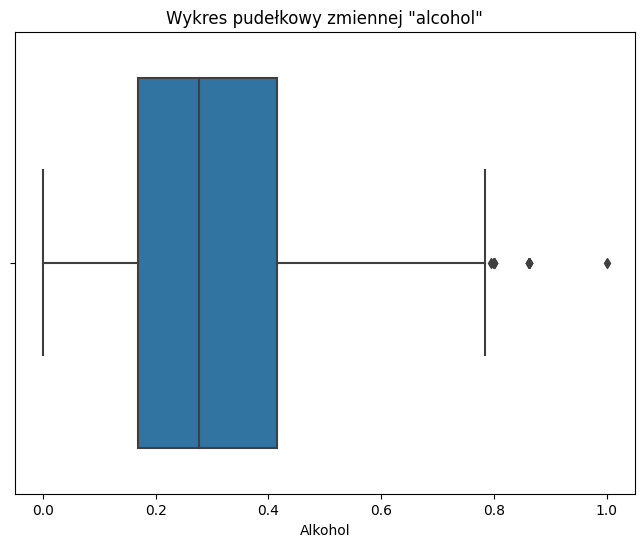

In [234]:
#Wykres pudełkowy (box plot) zmiennej "alcohol"
plt.figure(figsize=(8, 6))
sns.boxplot(x='alcohol', data=rw_3)
plt.title('Wykres pudełkowy zmiennej "alcohol"')
plt.xlabel('Alkohol')
plt.show()

0.4803428980015522


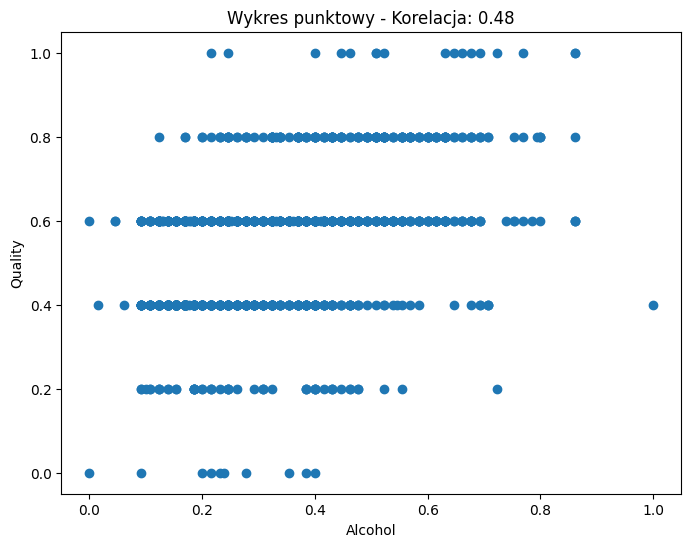

In [236]:
#Korelacje między "alcohol" a "quality"
correlation = rw_3['alcohol'].corr(rw_3['quality'])
print(correlation)

plt.figure(figsize=(8, 6))
plt.scatter(rw_3['alcohol'], rw_3['quality'])
plt.title(f'Wykres punktowy - Korelacja: {correlation:.2f}')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

<ipython-input-237-8dbe45eb443e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rw_3.corr()


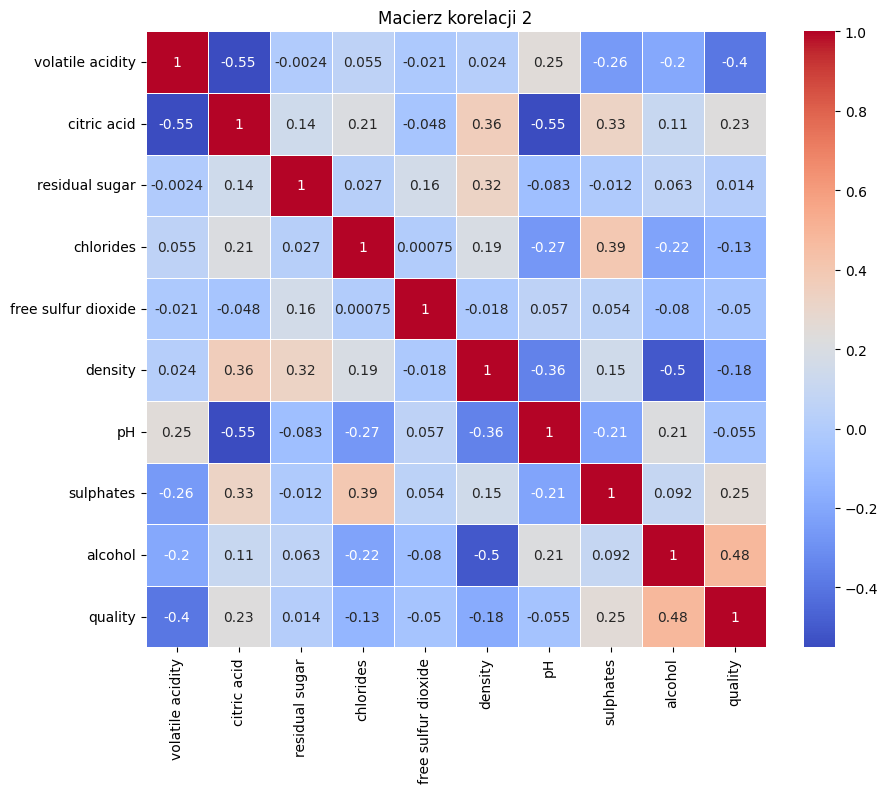

In [237]:
#Mapa cieplna korelacji między wszystkimi zmiennymi
correlation_matrix = rw_3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji 2')
plt.show()

**` 7. Podział na próbki treningową i testową`**

In [238]:
#Podział danych na cechy (X) i etykietę (Y)
X = rw_3 [['volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']]
y = rw_3 ['quality']

In [239]:
#Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train i y_train to dane treningowe, X_test i y_test to dane testowe

**` 8. Budowa modelu - min. 2 modeli wykorzystując różne algorytmy i/lub hiperparametry`**

In [240]:
#Budowa modelu regresji liniowej
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

In [241]:
#Budowa modelu drzewa decyzyjnego
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [242]:
#Przewidywanie na zbiorze testowym
y_pred_linreg = model_linreg.predict(X_test)
y_pred_tree = model_tree.predict(X_test)

# Miary oceny jakości dla modelu regresji liniowej
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
rmse_linreg = np.sqrt(mse_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

# Miary oceny jakości dla modelu drzewa decyzyjnego
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Model regresji liniowej - MSE: {mse_linreg}, RMSE: {rmse_linreg}, R-squared: {r2_linreg}")
print(f"Model drzewa decyzyjnego - MSE: {mse_tree}, RMSE: {rmse_tree}, R-squared: {r2_tree}")


Model regresji liniowej - MSE: 0.017062462456426213, RMSE: 0.1306233610669478, R-squared: 0.3784592701249453
Model drzewa decyzyjnego - MSE: 0.0310294117647059, RMSE: 0.1761516726139888, R-squared: -0.13032003938946324


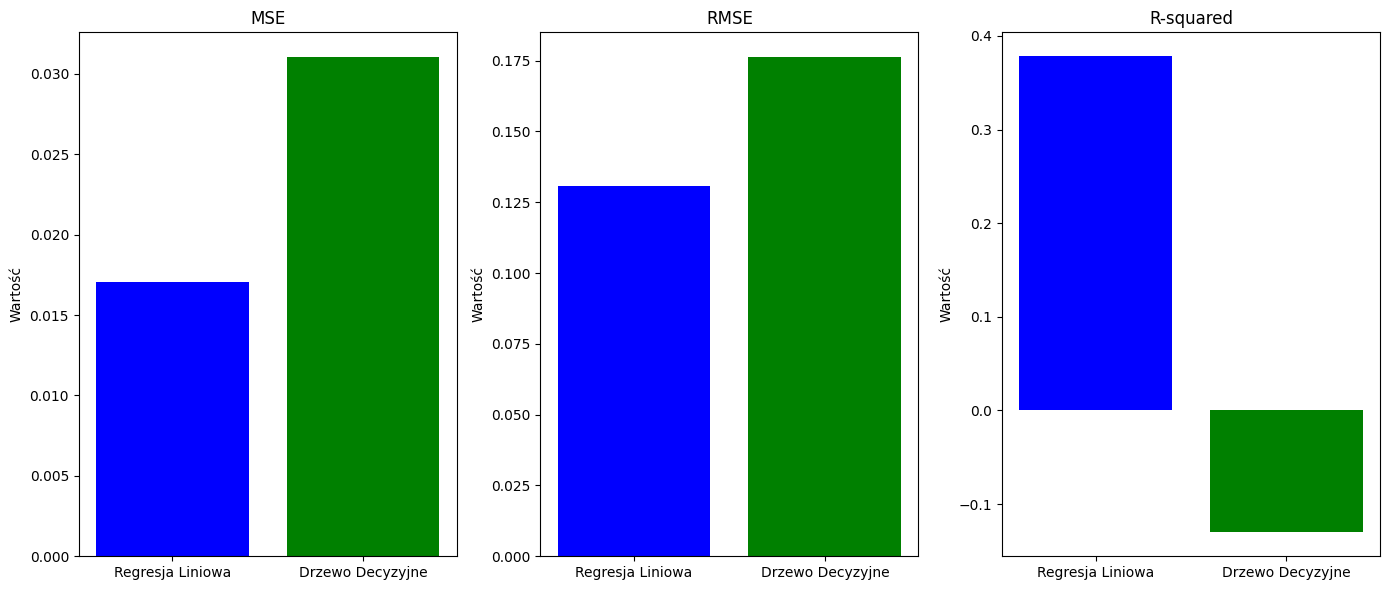

In [243]:
# Wyniki miar oceny jakości modeli
mse_values = [mse_linreg, mse_tree]
rmse_values = [rmse_linreg, rmse_tree]
r2_values = [r2_linreg, r2_tree]
models = ['Regresja Liniowa', 'Drzewo Decyzyjne']

# Wykres słupkowy porównujący wyniki
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('MSE')
plt.ylabel('Wartość')

plt.subplot(1, 3, 2)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('RMSE')
plt.ylabel('Wartość')

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R-squared')
plt.ylabel('Wartość')

plt.tight_layout()
plt.show()

**` 9. Ocena jakości modeli, porównanie.`**

In [244]:
#Podsumowanie
#Na podstawie wyników miar oceny jakości modeli regresji, możemy stwierdzić, że modele wypadają następująco:
#Model regresji liniowej:
#
#MSE wynosi 0.0171 (bardzo niski błąd),
#RMSE wynosi 0.1306 (niski pierwiastek z MSE),
#R-squared wynosi 0.3785 (model wyjaśnia 37.85% zmienności w danych).
#
#Model drzewa decyzyjnego:
#
#MSE wynosi 0.0310 (wyższy błąd niż w modelu regresji liniowej),
#RMSE wynosi 0.1762 (wyższy niż w modelu regresji liniowej),
#R-squared wynosi -0.1303 (model słabo wyjaśnia zmienność danych, może być gorszy niż model liniowy).
#
#Na podstawie tych wyników można stwierdzić, że w tym przypadku model regresji liniowej radzi sobie lepiej
#niż model drzewa decyzyjnego w przewidywaniu zmiennej "quality". Model regresji liniowej ma niższy błąd (MSE),
#niższy pierwiastek błędu (RMSE) i wyjaśnia większą część zmienności danych (wyższy R-squared).